Kawasaki Quantum Summer Camp 2025

# 量子コンピューター入門

Kifumi Numata, IBM Quantum (Jul 30, 2025)

In [ ]:
# Qiskitライブラリーを導入
from qiskit import QuantumCircuit
from qiskit_aer import StatevectorSimulator, AerSimulator
from qiskit.visualization import plot_bloch_multivector
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService

### 空の回路

1量子ビット回路から始めます。セルを選択して「Shift」＋「Enter」で実行できます。

In [ ]:
# １量子ビット回路を用意 
qc = QuantumCircuit(1)

qc.draw(output="mpl")    # 回路を描画

### Xゲート

In [ ]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

qc.draw(output="mpl")    # 回路を描画

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### Hゲート

In [ ]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### XゲートとHゲート

In [ ]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# 次にHゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### 1量子ビットゲートの書き方

    qc.x(0)    # X軸の周りのPi回転
    qc.y(0)    # Y軸の周りのPi回転
    qc.z(0)    # Z軸の周りのPi回転
    qc.s(0)    # Z軸の周りのPi/2回転
    qc.sdg(0)  # Z軸の周りの-Pi/2回転
    qc.h(0)    # Hゲート
    qc.rx(theta, 0)    # X軸の周りのtheta回転
    qc.ry(theta, 0)    # Y軸の周りのtheta回転
    qc.rz(theta, 0)    # Z軸の周りのtheta回転

## 演習 1

次の回路を作ってブロッホ球を表示してみましょう。

1-1)
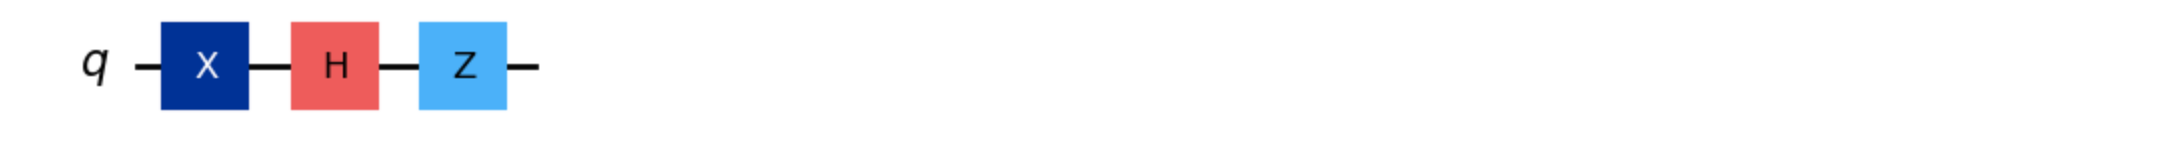

1-2)
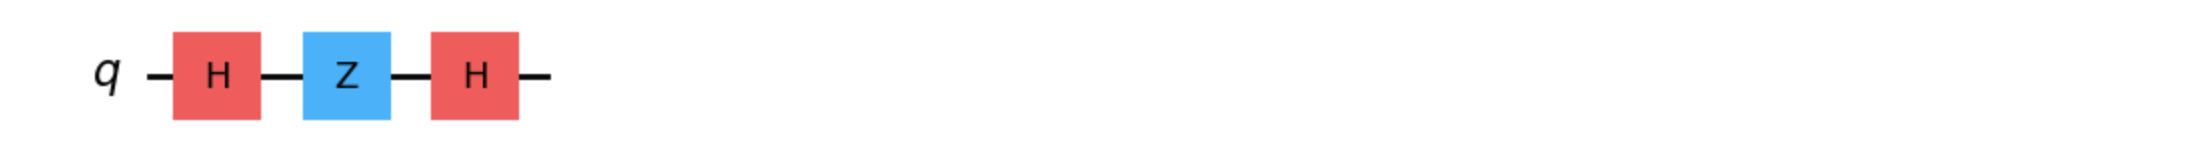

In [ ]:
# 1-1)
qc =  # １量子ビット回路を用意 

qc.
qc.
qc.

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

In [ ]:
# 1-2)
qc =     

qc.
qc.
qc.

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### 2量子ビット回路

In [ ]:
qc = QuantumCircuit(2)    # 2量子ビット回路を用意

qc.x(0)
qc.h(1)

qc.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### エンタングルメント

In [ ]:
# ２量子ビット回路を作成します。
qc = QuantumCircuit(2,2)    # 2量子ビット, 2古典ビットレジスター

# ゲートを適用します。
qc.h(0)
qc.cx(0,1)    # 制御NOTゲート

# 測定ゲートを追加
qc.measure(0,0)    # 量子ビットq0を測定して、古典レジスターc0に入れます
qc.measure(1,1)    # 量子ビットq1を測定して、古典レジスターc1に入れます

# 回路を描画
qc.draw(output="mpl")

まずシミュレーターで実験します。

In [ ]:
# シミュレーターで実験
backend = AerSimulator()
sampler = SamplerV2(backend)
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram( counts )

次に実量子コンピューターで実験します。    
先ほど保存した「apikey.json」ファイルから、apikeyをコピーして、次のセルの `deleteThisAndPasteYourAPIKeyHere` に上書きしてください。
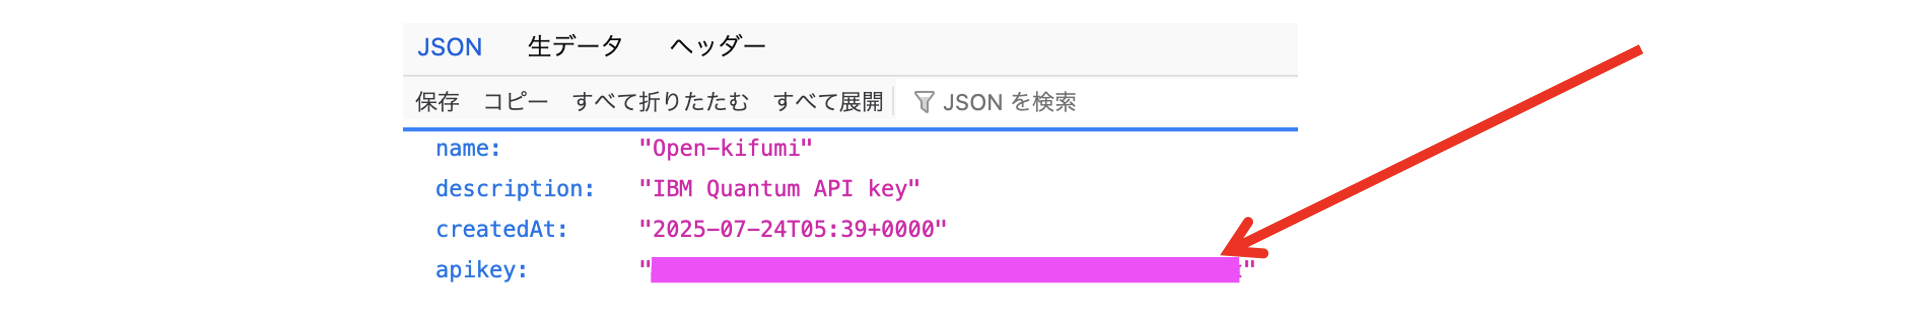
また、https://quantum.cloud.ibm.com/ にサインインし、CRNをコピーして、次のセルの `deleteThisAndPasteYourCRNHere` に上書きしてください。
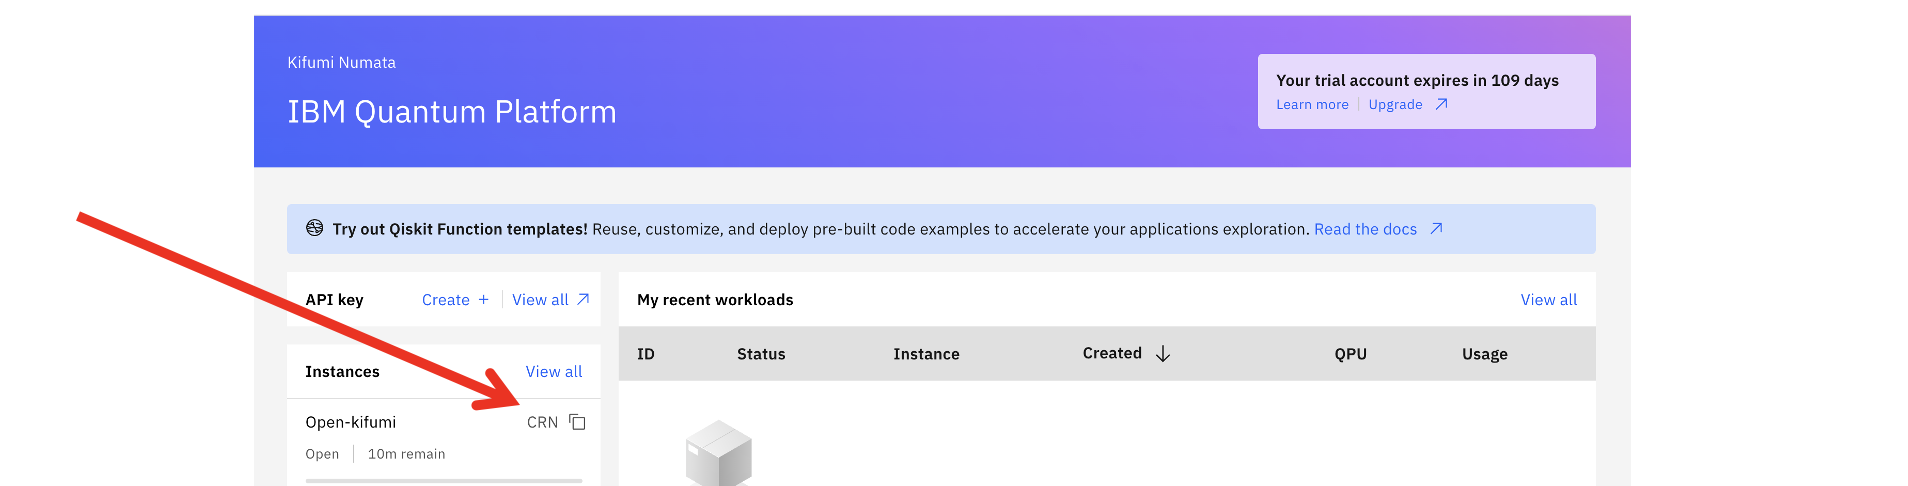

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

your_api_key = "deleteThisAndPasteYourAPIKeyHere"
your_crn = "deleteThisAndPasteYourCRNHere"

service = QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token=your_api_key, 
    instance=your_crn, 
    set_as_default=True, 
    overwrite=True,
)

In [ ]:
service = QiskitRuntimeService()
service.backends()

In [ ]:
# 以下でデバイスを指定できます。
backend = service.backend('ibm_brisbane') 

In [ ]:
#一番空いているバックエンドを自動的に選択することもできます
backend = service.least_busy(operational=True)
print("最も空いているバックエンドは: ", backend)

In [ ]:
# 実機のバックエンドでの実行に最適な回路に変換します
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

In [ ]:
# Samplerで実行します
sampler = SamplerV2(backend)
job = sampler.run([isa_circuit])

print("job id:", job.job_id()) # 実行に時間がかかるのでjob_idを表示します

In [ ]:
job = service.job(job.job_id()) 
#job = service.job("d1mbhan29o4s73aqp3c0") 
job.status() # ジョブの実行状態を確認します

上記のセルを何回か実行して、'DONE' が表示されたら、実機での実行が終わっているので、以下のセルを実行して結果を確認します。

In [ ]:
### 'DONE'になってから実行します ###
result = job.result()
print(result[0].data.c.get_counts())

In [ ]:
plot_histogram(result[0].data.c.get_counts())

実機での実行を待つ間に、演習に取り組んでみましょう。
## 演習 2

次の回路を作って量子シミュレーターで実行してみましょう。

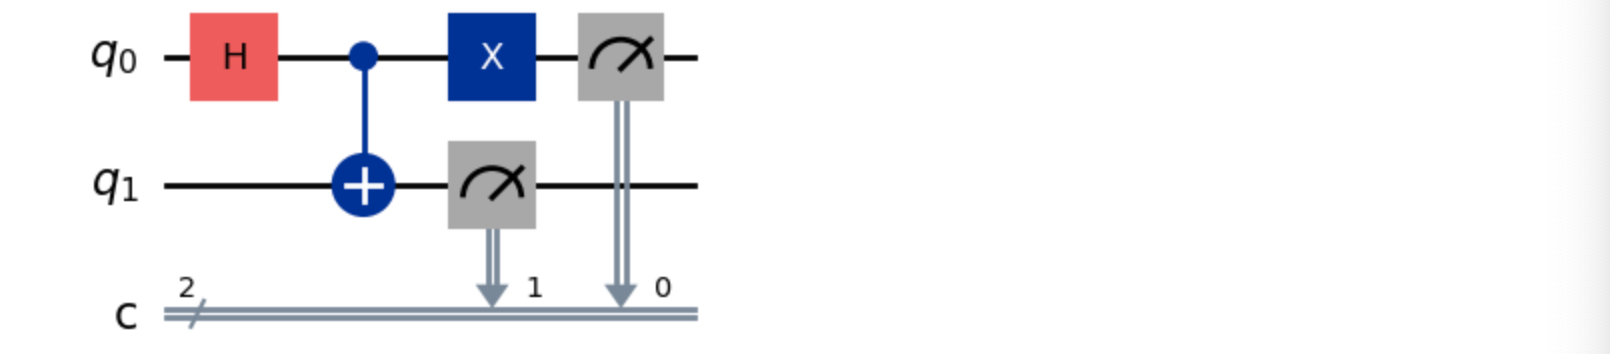

In [ ]:
# ２量子ビット回路を古典ビット含めて作成します。
qc = 

# ゲートを適用します。
qc.
qc.
qc.

# 測定ゲートを追加
qc.           # 量子ビットq0を測定して、古典レジスターc0に入れます
qc.           # 量子ビットq1を測定して、古典レジスターc1に入れます

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# シミュレーターで実験
backend = AerSimulator()
sampler = SamplerV2(backend)
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram( counts )

01と10が約半分ずつの測定されましたか？これも2量子ビットのエンタングルメント状態で、01と10の重ね合わせになっています。

## 演習 3

さらに時間の余った人は、次の回路を作って量子シミュレーターで実行してみましょう。この回路は、３量子ビットのエンタングルメントを作る回路で、作られる状態は、GHZ状態と呼ばれています。

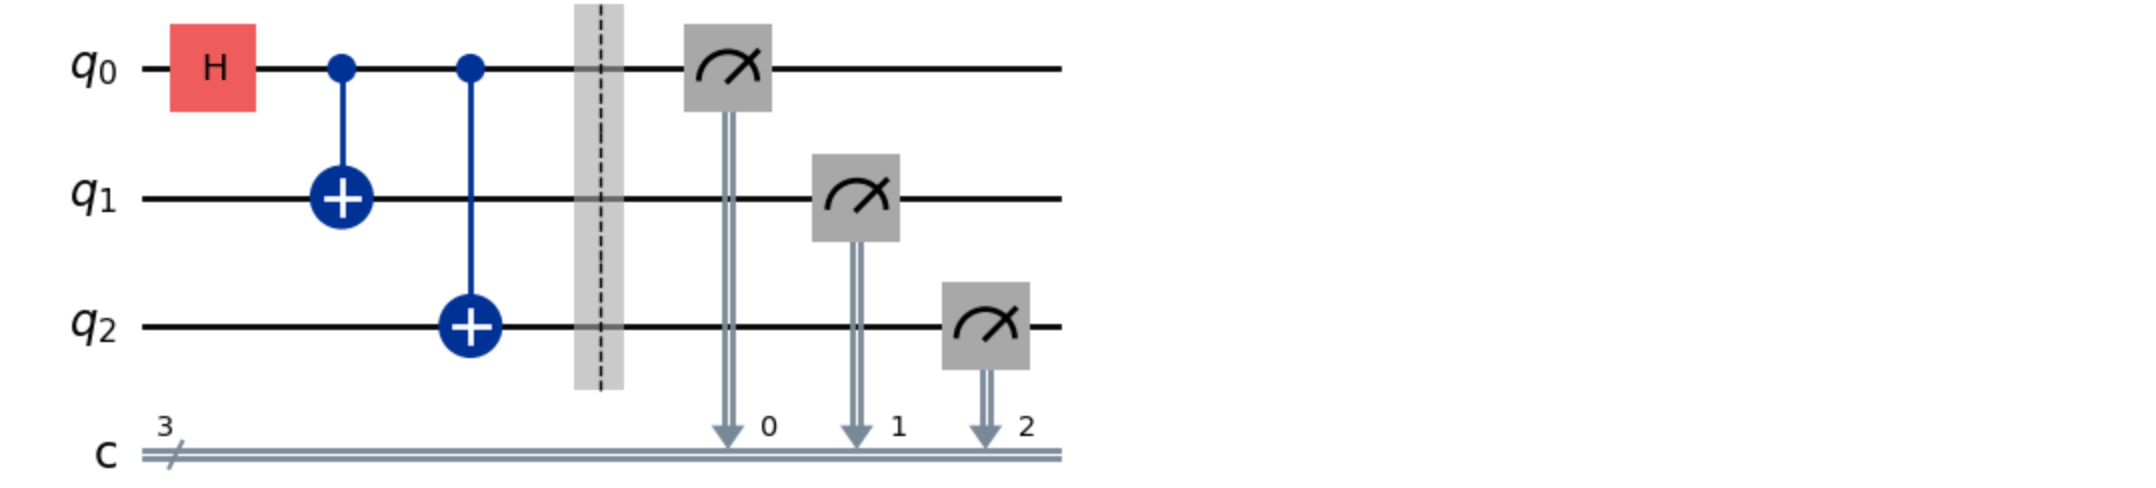

In [ ]:
# 3量子ビット回路を古典ビット含めて作成します。
qc = 

# ゲートを適用します。
qc.
qc.
qc.

qc.barrier()

# 測定ゲートを追加
qc.                # 量子ビットq0を測定して、古典レジスターc0に入れます
qc.                # 量子ビットq1を測定して、古典レジスターc1に入れます
qc.                # 量子ビットq1を測定して、古典レジスターc1に入れます

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# シミュレーターで実験
backend = AerSimulator()
sampler = SamplerV2(backend)
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram( counts )

000と111が観測されます。

In [ ]:
# Qiskitバージョンの確認
import qiskit
qiskit.__version__